In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#input data
raw_data = pd.read_csv('House_Rent_Dataset.csv', parse_dates=['Posted On'])

In [3]:
#5 data teratas
raw_data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
raw_data.shape

(4746, 12)

Set data ini memiliki 12 kolom dan 4746 baris

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4746 non-null   datetime64[ns]
 1   BHK                4746 non-null   int64         
 2   Rent               4746 non-null   int64         
 3   Size               4746 non-null   int64         
 4   Floor              4746 non-null   object        
 5   Area Type          4746 non-null   object        
 6   Area Locality      4746 non-null   object        
 7   City               4746 non-null   object        
 8   Furnishing Status  4746 non-null   object        
 9   Tenant Preferred   4746 non-null   object        
 10  Bathroom           4746 non-null   int64         
 11  Point of Contact   4746 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 445.1+ KB


Berdasarkan info tersebut terlihat bahwa set data ini tidak memiliki *missing value*

In [6]:
raw_data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


Tabel diatas menunjukkan statistik deskriptif dari set data tersebut. Nilai *Rent* dan *Size* terlihat dengan jelas memiliki rentang nilai yang sangat tinggi.

### Outliers

In [7]:
size_iqr = raw_data['Size'].quantile(0.75) - raw_data['Size'].quantile(0.25)
size_bawah = raw_data['Size'].quantile(0.25) - (1.5*size_iqr)
size_atas = raw_data['Size'].quantile(0.75) + (1.5*size_iqr)
size_out = raw_data[(raw_data['Size'] < size_bawah) | (raw_data['Size'] > size_atas)]
print('Presentase outliers Size:{0:.2f}%'.format(len(size_out)*100/len(raw_data)))

Presentase outliers Size:4.28%


In [8]:
Rent_iqr = raw_data['Rent'].quantile(0.75) - raw_data['Rent'].quantile(0.25)
Rent_bawah = raw_data['Rent'].quantile(0.25) - (1.5*Rent_iqr)
Rent_atas = raw_data['Rent'].quantile(0.75) + (1.5*Rent_iqr)
Rent_out = raw_data[(raw_data['Rent'] < Rent_bawah) | (raw_data['Rent'] > Rent_atas)]
print('Presentase outliers Rent:{0:.2f}%'.format(len(Rent_out)*100/len(raw_data)))

Presentase outliers Rent:10.96%


Feature Size memiliki jumlah outliers yang tidak terlalu signifikan (<5%) sedangkan untuk kolom Rent memiliki jumlah outliers yang cukup signifikan.

C:\Users\Rizaldi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rent'>

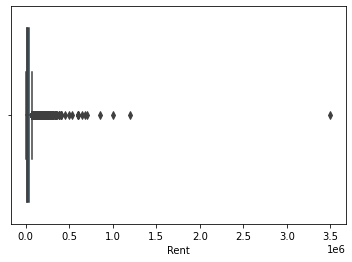

In [9]:
sns.boxplot(raw_data['Rent'])

C:\Users\Rizaldi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size'>

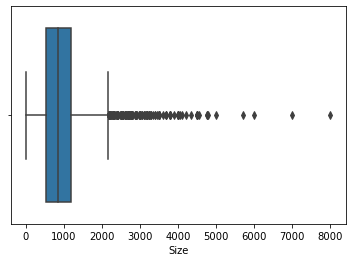

In [10]:
sns.boxplot(raw_data['Size'])

Berdasarkan dua boxplot tersebut terlihat dengan jelas poin data yang merupakan outliers. Pada percobaan ini saya akan melakukan pembatasan nilai untuk kolom size dan rent. Kolom size akan dibatasi untuk size < 5000, sedangkan kolom rent akan dibatasi rent dibawah satu juta. 

In [11]:
raw_data = raw_data[(raw_data['Rent']<1e6) & (raw_data['Size']<5000)]
raw_data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [12]:
raw_data.describe()

,BHK,Rent,Size,Bathroom
count,4739.000000,4739.000000,4739.000000,4739.000000
mean,2.081663,33641.890694,961.056552,1.961384
std,0.829668,55192.756778,608.045007,0.873358
min,1.000000,1200.000000,10.000000,1.000000
25%,2.000000,10000.000000,550.000000,1.000000
50%,2.000000,16000.000000,850.000000,2.000000
75%,3.000000,32250.000000,1200.000000,2.000000
max,6.000000,850000.000000,4800.000000,7.000000


### Kolom Posted On

kolom posted on ini pada sebenarnya hanya merupakan tanggal saat tempat tinggal tersebut diiklankan

C:\Users\Rizaldi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rizaldi\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Posted On', ylabel='Density'>

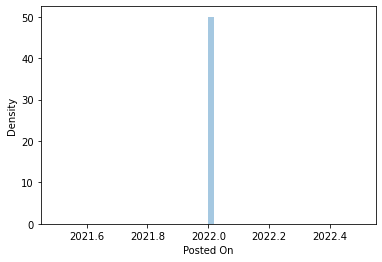

In [13]:
sns.distplot(raw_data['Posted On'].dt.year)

Karena terlihat bahwa semua tempat tinggal diiklankan pada tahun 2022 sehingga dapat kita katakan bahwa kolom ini tidak akan memberikan pengaruh pada model.(jika tahun pengiklanannya berbeda jauh bisa jadi harga telah obsolete dan tahun pengiklanan dapat memberikan kontribusi pada model)

In [14]:
raw_data.drop(['Posted On'], axis=1, inplace=True)
raw_data.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


### Floor

Kolom ini menunjukkan lokasi dari tempat tinggal tersebut. Contoh: Ground out of 2, berarti tempat tinggal berada pada lantai ground dari total bangunan yang memiliki 2 lantai.

In [15]:
raw_data['Floor'].nunique()

478

Terlihat bahwa kolom floor memiliki nilai unik yang sangat banyak. Oleh karena itu nilai tersebut akan saya kelompokkan kedalam 4 kategori yaitu basement, ground, middle, top. Basement berarti tempat tinggal berada di Basement, demikian pula dengan ground. Untuk middle dan top, dikategorikan apabila tempat tinggal berada pada lantai 1 sampai dengan lantai 5 maka termasuk middle. Sedangkan apabila tempat tinggal berada di atas lantai 5 maka akan dikategorikan sebagai top.

In [16]:
raw_data_floor = raw_data.copy()
raw_data_floor.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [17]:
def floor(df):
    val = 0
    
    try: 
        if 'Ground' in df[0]:
            val = 'Ground'
        elif 'Basement' in df[0]:
            val = 'Basement'
        else:
            if df[0] < '5':
                val = 'Mid'
            elif df[0] >= '5':
                val = 'Top'
    except:
        val = 'Unknown'
    return val

In [18]:
raw_data_floor['Floor'] = raw_data_floor['Floor'].apply(lambda x: x.split(' out of '))

In [19]:
raw_data_floor['Floor'] = raw_data_floor['Floor'].apply(floor,1)

In [20]:
raw_data_floor['Floor'].value_counts()

Mid         3309
Ground       926
Top          471
Basement      33
Name: Floor, dtype: int64

In [21]:
raw_data_floor.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Mid,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Mid,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Mid,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Mid,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Kolom floor ini nantinya akan dilakukan **one hot encoding**. Hal ini karena kolom tersebut masih merupakan data kategorikal, selain itu one hot encoding saya lakukan karena saya tidak mengetahui hubungan antara lokasi lantai tempat tinggal dengan harga tempat tinggal tersebut.

### Area Type

Area type merupakan suatu jenis perhitungan ukuran suatu bangunan di India. Terdapat 3 jenis area type yaitu: Carpet Area, Built Area, dan Super Area. Secara umum carpet area adalah ukuran dasar (hanya bagian dalam) dari suatu bangunan, sehingga apabila bangunan diukur pada built area dan super area maka ukuran bangunan tersebut akan lebih besar. Pengertian lebih lengkap dapat dibaca pada https://www.magicbricks.com/blog/what-is-carpet-area/114783.html.

In [22]:
raw_areatyp = raw_data_floor.copy()

In [23]:
raw_areatyp['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

Bagian Area Type akan diencoded secara langsung menjadi 3 yaitu 0 untuk Super Area, 1 untuk Built Area, 2 untuk Carpet Area. Hal ini dilakukan karena apabila bangunan diukur dalam Carpet Area maka bangunan tersebut akan lebih besar bila diukur dalam Built Area dan Super Area. Ukuran ini akan mempengaruhi nilai sewa dari suatu bangunan

In [25]:
raw_areatyp['Area Type'] = raw_areatyp['Area Type'].map(dict(zip(raw_areatyp['Area Type'].unique(),[0,2,1])))

In [26]:
raw_areatyp.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground,0,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Mid,0,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Mid,0,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Mid,0,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Mid,2,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


### Area Locality

Area locality akan diwakilkan oleh kota karena memiliki nilai unique value yang tinggi sehingga kolom tersebut akan didrop. Kemudian city akan dikategorikan menjadi padat penduduk dan tidak berdasarkan populasi pada kota tersebut. Setelah browsing berikut jumlah densitas populasi masing-masing kota:

1. Kolkata: 24,000 people per square kilometer
2. Mumbai: 25,357 people per sq. km
3. Bangalore: 6,007 people per square kilometer
4. Delhi: 11,312 people per sq km
5. Chennai: 26,553 people per square kilometers
6. Hyderabad: 18,480 people per square kilometer

Dari data tersebut dapat dibagi menjadi 2 yaitu padat penduduk dengan densitas > 20000 orang per $km^{2}$ dan sisanya tidak padat penduduk

In [27]:
raw_city = raw_areatyp.copy()

In [28]:
raw_city['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [29]:
raw_city['City'] = raw_city['City'].map(dict(zip(raw_city['City'].unique(),[1,1,0,0,1,0])))

In [30]:
raw_city.drop(columns=['Area Locality'], inplace=True)
raw_city.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground,0,1,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Mid,0,1,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Mid,0,1,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Mid,0,1,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Mid,2,1,Unfurnished,Bachelors,1,Contact Owner


### Furnishing Status

Kolom ini berisikan keterangan apakah tempat tinggal tersebut telah dilengkapi perabotan atau tidak. Secara logika dapat kita katakan bahwa tempat tinggal dengan perabotan akan memiliki nilai sewa yang lebih tinggi.

In [31]:
raw_furn = raw_city.copy()

In [32]:
raw_furn['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [33]:
raw_furn['Furnishing Status'] = raw_furn['Furnishing Status'].map(dict(zip(raw_furn['Furnishing Status'].unique(),[0,1,2])))
raw_furn.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground,0,1,0,Bachelors/Family,2,Contact Owner
1,2,20000,800,Mid,0,1,1,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Mid,0,1,1,Bachelors/Family,1,Contact Owner
3,2,10000,800,Mid,0,1,0,Bachelors/Family,1,Contact Owner
4,2,7500,850,Mid,2,1,0,Bachelors,1,Contact Owner


### Tenant Preferred & Point of Contact

Kolom Tenant Preferred berisikan tentang kecenderungan peruntukan dari tempat tinggal yang disewakan. Sedangkan kolom Point of Contact berisikan orang yang harus dihubungi apabila ingin menyewa tempat tersebut. Saya tidak tahu dengan pasti hubungan antara kedua kolom ini dengan harga sewa oleh karena itu kolom-kolom ini akan dilakukan one-hot encoding.

### One Hot Encoding

In [34]:
raw_ohe = raw_furn.copy()
raw_ohe.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground,0,1,0,Bachelors/Family,2,Contact Owner
1,2,20000,800,Mid,0,1,1,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Mid,0,1,1,Bachelors/Family,1,Contact Owner
3,2,10000,800,Mid,0,1,0,Bachelors/Family,1,Contact Owner
4,2,7500,850,Mid,2,1,0,Bachelors,1,Contact Owner


In [35]:
dummies_floor = pd.get_dummies(raw_ohe['Floor'], prefix='Floor')
dummies_floor.head()

,Floor_Basement,Floor_Ground,Floor_Mid,Floor_Top
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [36]:
dummies_tenant = pd.get_dummies(raw_ohe['Tenant Preferred'], prefix='Tenant')
dummies_tenant.head()

,Tenant_Bachelors,Tenant_Bachelors/Family,Tenant_Family
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0


In [37]:
dummies_contact = pd.get_dummies(raw_ohe['Point of Contact'], prefix='Contact')
dummies_contact.head()

,Contact_Contact Agent,Contact_Contact Builder,Contact_Contact Owner
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [38]:
data_con = pd.concat([raw_ohe,dummies_floor,dummies_tenant,dummies_contact],axis=1).drop(
    columns=['Floor','Tenant Preferred','Point of Contact'])
data_con.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Floor_Basement,Floor_Ground,Floor_Mid,Floor_Top,Tenant_Bachelors,Tenant_Bachelors/Family,Tenant_Family,Contact_Contact Agent,Contact_Contact Builder,Contact_Contact Owner
0,2,10000,1100,0,1,0,2,0,1,0,0,0,1,0,0,0,1
1,2,20000,800,0,1,1,1,0,0,1,0,0,1,0,0,0,1
2,2,17000,1000,0,1,1,1,0,0,1,0,0,1,0,0,0,1
3,2,10000,800,0,1,0,1,0,0,1,0,0,1,0,0,0,1
4,2,7500,850,2,1,0,1,0,0,1,0,1,0,0,0,0,1


### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = data_con.drop(columns=['Rent'])
X

,BHK,Size,Area Type,City,Furnishing Status,Bathroom,Floor_Basement,Floor_Ground,Floor_Mid,Floor_Top,Tenant_Bachelors,Tenant_Bachelors/Family,Tenant_Family,Contact_Contact Agent,Contact_Contact Builder,Contact_Contact Owner
0,2,1100,0,1,0,2,0,1,0,0,0,1,0,0,0,1
1,2,800,0,1,1,1,0,0,1,0,0,1,0,0,0,1
2,2,1000,0,1,1,1,0,0,1,0,0,1,0,0,0,1
3,2,800,0,1,0,1,0,0,1,0,0,1,0,0,0,1
4,2,850,2,1,0,1,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,2,0,1,2,0,0,1,0,0,1,0,0,0,1
4742,3,2000,0,0,1,3,0,0,1,0,0,1,0,0,0,1
4743,3,1750,2,0,1,3,0,0,1,0,0,1,0,1,0,0
4744,3,1500,2,0,1,2,0,0,1,0,0,0,1,1,0,0


In [41]:
Y = data_con['Rent']
Y

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4739, dtype: int64

In [42]:
feature_train, feature_test, label_train, label_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [43]:
# save hasil pre-processing
lis=[feature_train, feature_test, label_train, label_test]
lis2=['feature_train', 'feature_test', 'label_train', 'label_test']
for cs,st in zip(lis,lis2):
    cs.to_csv(f'{st}.csv',index=False)

Proses Pre Processing diakhiri dengan menyimpan data yang telah bersih